In [18]:
using Plots
using LaTeXStrings

##### 1.- En clase vimos el método de Euler mejorado en el que nosotros introducimos el Jacobiano de forma analítica para ser evaluado por el método de integración. Realice una función que implemente el mismo método de integración, pero en lugar de calcular el Jacobiano con una función que lo evalúa analíticamente, ahora sea calculado de manera numérica utilizando la derivación numérica.

In [17]:
#jacobiano autónomo general
function jacobiano(xi,h,func)
    
    jac=zeros(length(func(xi)),length(xi))
    
    for i in 1:length(func(xi)), j in 1:length(xi)
        
        xp1=zeros(length(xi))
        xp2=zeros(length(xi))
        for k in 1:length(xi)
            if  k==j #k==i ||
                xp1[k]=xi[j]+h
                xp2[k]=xi[j]-h
            else
                xp1[k]=xi[j]
                xp2[k]=xi[j]
            end
        end
        jac[i,j]=(func(xp1)[i]-func(xp2)[i])/(xp1[j]-xp2[j])
    end
    return jac
end

jacobiano (generic function with 1 method)

Definimos al jacobiano dependiente del tiempo:

In [19]:
#jacobiano autónomo general
function jacobianotemp(xi,h,func,t)
    jac=zeros(length(func(xi,t)),length(xi)+1)
    for i in 1:length(func(xi,t)), j in 1:length(xi)
        xp1=zeros(length(xi))
        xp2=zeros(length(xi))
        for k in 1:length(xi)
            if  k==j #k==i ||
                xp1[k]=xi[j]+h
                xp2[k]=xi[j]-h
            else
                xp1[k]=xi[j]
                xp2[k]=xi[j]
            end
        end
        jac[i,j]=(func(xp1,t)[i]-func(xp2,t)[i])/(xp1[j]-xp2[j])
        jac[i,end]=(func(xi,t+h)[i]-func(xi,t-h)[i])/(2*h)
    end
    return jac
end

jacobianotemp (generic function with 1 method)

In [21]:
function Euler_mejorado_Jmejorado(edo,p_ini,t)
    # J y g con dependencia temporal.
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        eval_edo = edo(sol[i,:],t[i])
        if length(eval_edo) == length(p_ini)
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo
        else
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo[1:(end-1)]
        end
        h=sol[2,2]-sol[2,1]
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacobianotemp(sol[i,:],h,edo,t[i]) *eval_edo )
    end
    return sol
end

Euler_mejorado_Jmejorado (generic function with 1 method)

In [99]:
function sistema1_t(xyz,t)
    # xyz = [x1, x2, x3]
    dx = xyz[2]
    dy = xyz[3]
    dz = -xyz[3]*xyz[3] + 3*xyz[2]*xyz[2]*xyz[2] - cos(xyz[1])*cos(xyz[1]) + exp(-1*t)*sin(3*t)
    return [dx,dy,dz]
end

sistema1_t (generic function with 1 method)

In [22]:
tiempo = collect(1:0.001:1.5)
solucion = Euler_mejorado_Jmejorado(sistema1_t,[1.0,2.0,1.0],tiempo)

LoadError: UndefVarError: sistema1_t not defined

### 2.- Utilizando los integradores de Euler mejorado con Jacobiano analítico, Euler mejorado con Jacobiano numérico, Runge-Kutta de $2^{\circ}$ orden y Runge-Kutta de $4^{\circ}$ orden, encuentre un paso de integración que proporcione una precisión de $10^{−4}$ en la solución para la siguiente ecuación:

$$
\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + \cos^2{y} = e^{-t}\sin{3t}
$$

##### Con condiciones iniciales $\ddot{y}(1)=1$, $\dot{y}(1)=2$, $y(1)=1$. En particular, ¿qué sucede en en $t\in[1,2]$ y $t\in[1,2.1]$?

In [67]:
function Euler_mejorado_J_p(edo,xi,t,jacob)
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        J=jacobianotemp(xi, δ ,edo)
        sol[i+1,:] .= sol[i,:] .+ δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i]) *edo(sol[i,:],t[i])) # ojo sistema autonomo
    end
    return sol
end

Euler_mejorado_J_p (generic function with 1 method)

In [70]:
function Euler_mejorado_J_t(edo,p_ini,t,jacob)
    # J y g con dependencia temporal.
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        eval_edo = edo(sol[i,:],t[i])
        if length(eval_edo) == length(p_ini)
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo
        else
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo[1:(end-1)]
        end
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i]) *eval_edo )
    end
    return sol
end

Euler_mejorado_J_t (generic function with 1 method)

Runge-Kutta de 2do orden: 

In [58]:
function RK_2(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ)
    end
    return sol
end

RK_2 (generic function with 1 method)

Runge-Kutta de 4to orden:

In [59]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

In [75]:
#Provando la función 
tiempo = collect(1:0.001:1.5)
solucion = RK_2(EDO1_1,[1.0,2.0,1.0],tiempo)

501×3 Array{Float64,2}:
 1.0      2.0       1.0
 1.002    2.00101   1.02276
 1.004    2.00205   1.0455
 1.006    2.0031    1.06824
 1.00801  2.00418   1.09097
 1.01001  2.00528   1.11369
 1.01202  2.00641   1.13639
 1.01403  2.00756   1.15909
 1.01603  2.00873   1.18178
 1.01804  2.00992   1.20446
 1.02005  2.01114   1.22713
 1.02207  2.01237   1.24979
 1.02408  2.01364   1.27244
 ⋮                 
 2.58926  6.00528  22.6139
 2.59528  6.02796  22.7518
 2.60132  6.05078  22.8909
 2.60738  6.07374  23.0311
 2.61346  6.09684  23.1725
 2.61957  6.12009  23.315
 2.6257   6.14347  23.4587
 2.63186  6.167    23.6037
 2.63804  6.19068  23.7498
 2.64424  6.2145   23.8971
 2.65047  6.23848  24.0457
 2.65672  6.2626   24.1955

Ahora definimos las funciones de las ecuaciones diferenciales. Para ello notemos que podemos reescribir la ecuación diferencial como un sistema de ecuaciones diferenciales:

$$
x_1=y\\
\dot{x}_1 = x_2\\
\dot{x}_2 = x_3\\
\dot{x}_3 = -x_3^2 + 3x_2^3 - \cos^2{(x_1)} + e^{-t}\sin{(3t)}
$$

Y cuyas condiciones iniciales son: $x_1(1)=1$, $x_2(1)=2$ y $x_3(1)=1$. Las cuales, podemos escribir en una función de la siguiente manera:

In [62]:
function EDO1_1(vec,t)
    # vec = [x1, x2, x3]
    dx1 = vec[2]
    dx2 = vec[3]
    dx3 = -vec[3]*vec[3] + 3*vec[2]*vec[2]*vec[2] - cos(vec[1])*cos(vec[1]) + exp(-t)*sin(3*t)
    return [dx1,dx2,dx3]
end

EDO1_1 (generic function with 1 method)

In [71]:
function EDO1(vec,t)
    # vec = [x1, x2, x3]
    dx1 = vec[2]
    dx2 = vec[3]
    dx3 = -vec[3]*vec[3] + 3*vec[2]*vec[2]*vec[2] - cos(vec[1])*cos(vec[1]) + exp(-t)*sin(3*t)
    return [dx1,dx2,dx3,1.0]
end

EDO1 (generic function with 1 method)

Y ahora definimos su Jacobiano analítico

In [61]:
function EDO1_J(vec,t)
    # vec = [x1, x2, x3]
    J = zeros(3,4)
    J[1,2] = 1.0
    J[2,3] = 1.0
    J[3,1] = 2*cos(vec[1])*sin(vec[1])
    J[3,2] = 9*vec[2]*vec[2]
    J[3,3] = -2*vec[3]
    J[3,4] = 3*exp(-1*t)*cos(3*t)-exp(-1*t)*sin(3*t)
    return J
end

EDO1_J (generic function with 1 method)

Ahora resolvamos esta ecuación diferencial con los diversos métodos en t=[1,2], para obtener un error de menos de 10^{-4}

#### 3.- Modifique las funciones integradoras que programamos en clase (Euler mejorado, Runge-Kutta de $2^{\circ}$ orden y Runge-Kutta de $4^{\circ}$ orden) para que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial

$$
\ddot{x} + \frac{1}{10}\dot{x}+4\sin{x} = \frac{1}{2}\sin{(\omega t)}
$$

#### Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=1$ y para $\omega\in\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado. La solución debe tener una precisión de por lo menos $10^{−5}$.

Notemos que podemos escribir la ecuación diferencial como un sistema de ecuaciones diferenciales donde:
$$
x=x_1\\
\dot{x}_1 = x_2\\
\dot{x}_2 = -\frac{1}{10}x_2 - 4\sin{(x_1)} + \frac{1}{2}\sin{(\omega t)}
$$
Ahora escribamos este sistema como una función en Julia y su jacobiano de manera analítica.

In [76]:
function EDO2(vec,t,ω)
    # vec = [x1, x2]
    dx1 = vec[2]
    dx2 = -vec[2]/10 - 4*sin(vec[1]) + 0.5*sin(ω*t)
    return [dx1,dx2,1.0]
end

EDO2 (generic function with 1 method)

Ahora el jacobiano analítico:

In [77]:
function EDO2_J(vec,t,ω)
    # param = [ omega ]
    # vec = [x1, x2]
    #ω = param
    J = zeros(length(vec),length(vec)+1)
    J[1,2] = 1.0
    J[2,1] = -4*cos(vec[1])
    J[2,2] = -1/10
    J[2,3] = 0.5*ω*cos(ω*t)
    return J
end

EDO2_J (generic function with 1 method)

Ahora modifiquemos las funciones de Euler mejorado:

In [78]:
function Euler_mejorado_omega(edo,p_ini,t,jacob,ω)
    # J y g con dependencia temporal y de parametros externos
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        eval_edo = edo(sol[i,:],t[i],ω)
        if length(eval_edo) == length(p_ini)
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo
        else
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo[1:(end-1)]
        end
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i],ω) *eval_edo )
    end
    return sol
end

Euler_mejorado_omega (generic function with 1 method)

Definimos la ecuación diferencia para los métodos de Runge-Kutta.

In [31]:
function EDO2_1(vec,t,ω)
    # vec = [x1, x2]
    dx1 = vec[2]
    dx2 = -vec[2]/10 - 4*sin(vec[1]) + 0.5*sin(ω*t)
    return [dx1,dx2]#,1.0]
end

EDO2_1 (generic function with 1 method)

Modificamos la función de Runge-Kutta de 2do orden:

In [32]:
function RK_2_1(edo,x_ini,t,ω)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i],ω) #solo agregamos un param para que no haya problemas de matcheo
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ,ω)
    end
    return sol
end

RK_2_1 (generic function with 1 method)

Modificamos la función de Runge-Kutta de 4to orden:

In [85]:
function RK_4_1(edo,x_ini,t,ω)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i],ω)
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ,ω)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ,ω)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ,ω)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4_1 (generic function with 1 method)

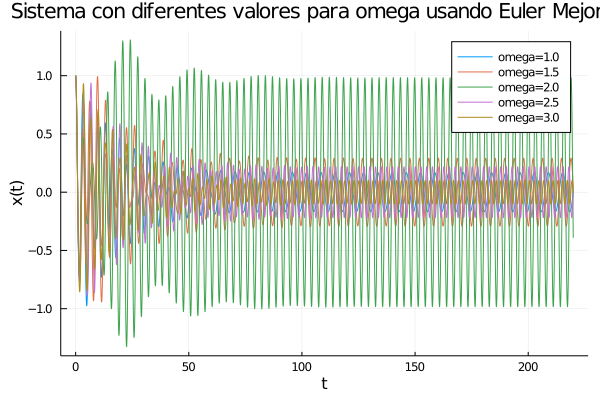

In [86]:
plot(title="Sistema con diferentes valores para omega usando Euler Mejorado",xlabel="t",ylabel="x(t)")
tiempo = collect(0:0.01:70π)
omegas = collect(1:0.5:3) #tomamos solamente 5 valores de ω
for ω in omegas
    solucion = RK_4_1(EDO2_1,[1.0,0.0],tiempo,ω)
    plot!(tiempo,solucion[:,1],label ="omega=$(ω)", lw=1.0)
end
plot!()

Ya que probamos nuestras funciones, entonces resolvamos el sistema con las condiciones dadas y para diversas omegas, para ello, encontremos el espacio en nuestra malla para que nos de un error menor a 10^{-5}

####  4.- Considere el siguiente sistema de ecuaciones diferenciales

$$
\frac{dx}{dt} = 10(y-x)\\
\frac{dy}{dt} = x(28-z) - y\\
\frac{dz}{dt} = xy - \frac{8}{3}z
$$

#### Realice una integración numérica del sistema de ecuaciones con el método de Runge-Kutta de $4^{\circ}$ y realice los siguientes ejercicios:
#### (a)  Elija una condición inicial aleatoria en el $x,y,z\in[-5,5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$, comente sus observaciones. 

#### (b) Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entre si en $10^{−2}$.

#### Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda apreciar diferencias en el comportamiento de las soluciones. Además asegure que cada una de las soluciones que encuentre sea convergente en por lo menos 5 cifras ($10^{-5}$), es decir encuentre un paso adecuado para realizar la integración.

Escribamos la función que nos de el sistema de ecuaciones:

In [87]:
function EDO3(vec,t)
    # vec = [x1, x2, x3]
    dx = 10*vec[2] - 10*vec[1]
    dy = 28*vec[1] - vec[1]*vec[3] - vec[2]
    dz = vec[1]*vec[2] - 8*vec[3]/3
    return [dx,dy,dz]
end

EDO3 (generic function with 1 method)

Para escojer nuestras condiciones iniciales tomemos 5 y un valor aleatorio entre 0 y 1.

In [91]:
vec0=[5rand(),-5rand(),5rand()]

3-element Array{Float64,1}:
  2.9711303026800193
 -2.36716486325232
  2.900353905604102

Veamos cual es el valor del paso para tener la condición de la convergencia pedida.

Realicemos la gráfica de la solución en el plano xy:

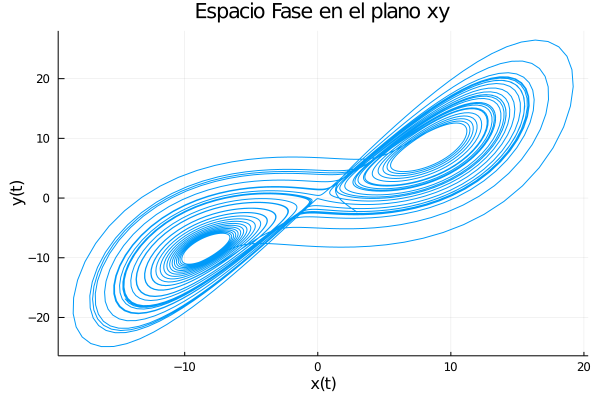

In [98]:
tiempo = collect(0:0.01:13π)
solucion4 = RK_4(EDO3,vec0,tiempo) #introducimos las condiciones iniciales aleatorias
plot(title="Espacio Fase en el plano xy",xlabel="x(t)",ylabel="y(t)")
plot!(solucion4[:,1],solucion4[:,2])
plot!(legend=false)

Para el plano xz:

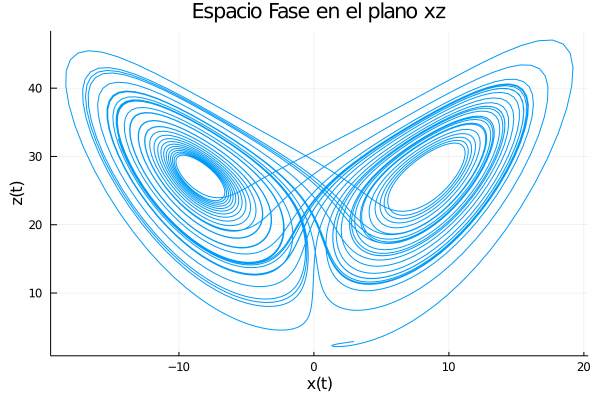

In [99]:
plot(title="Espacio Fase en el plano xz",xlabel="x(t)",ylabel="z(t)")
plot!(solucion4[:,1],solucion4[:,3])
plot!(legend=false)

En el plano yx:

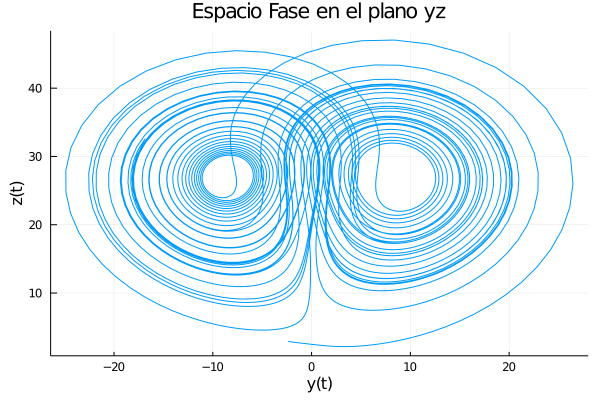

In [100]:
plot(title="Espacio Fase en el plano yz",xlabel="y(t)",ylabel="z(t)")
plot!(solucion4[:,2],solucion4[:,3])
plot!(legend=false)

Observaciones:

b) Iniciamos escogiendo nuestras soluciones en función de las condiciones inciales pasadas.

In [107]:
vec0_1=[vec0[1]+0.1,vec0[2]+0.001,vec0[3]-0.1]
tiempo = collect(0:0.01:13π)
solucion4_1 = RK_4(EDO3,vec0_1,tiempo)

4085×3 Array{Float64,2}:
  3.07113  -2.36616      2.80035
  2.58988  -1.63337      2.671
  2.21862  -1.01186      2.56945
  1.93751  -0.476678     2.48663
  1.73079  -0.00698165   2.41684
  1.58602   0.414647     2.35657
  1.49345   0.802866     2.3038
  1.44554   1.17013      2.25745
  1.43659   1.52718      2.2172
  1.46236   1.88344      2.18322
  1.5199    2.24734      2.15612
  1.60728   2.62663      2.13694
  1.72349   3.02859      2.12714
  ⋮                     
 17.2852   19.3349      37.4665
 17.385    17.315       39.6222
 17.267    14.9807      41.3456
 16.9275   12.4468      42.5745
 16.3746    9.83976     43.2864
 15.6279    7.28282     43.4988
 14.7157    4.88162     43.2632
 13.6728    2.71513     42.6548
 12.5366    0.831902    41.7595
 11.3439   -0.748462    40.6636
 10.1289   -2.03029     39.4448
  8.92121  -3.03517     38.1677

Obtengamos los espacio fase para la solución con la segunda solución:

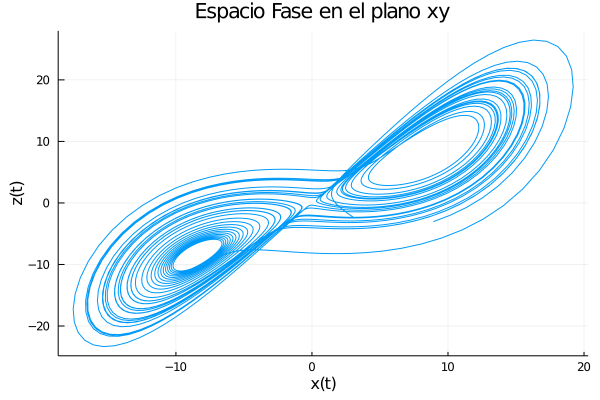

In [110]:
plot(title="Espacio Fase en el plano xy",xlabel="x(t)",ylabel="z(t)")
plot!(solucion4_1[:,1],solucion4_1[:,2])
plot!(legend=false)

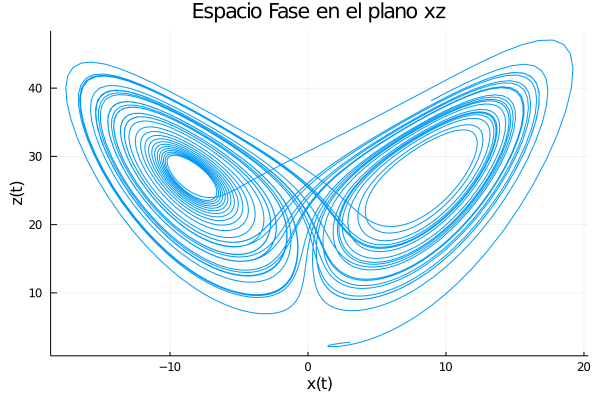

In [109]:
plot(title="Espacio Fase en el plano xz",xlabel="x(t)",ylabel="z(t)")
plot!(solucion4_1[:,1],solucion4_1[:,3])
plot!(legend=false)

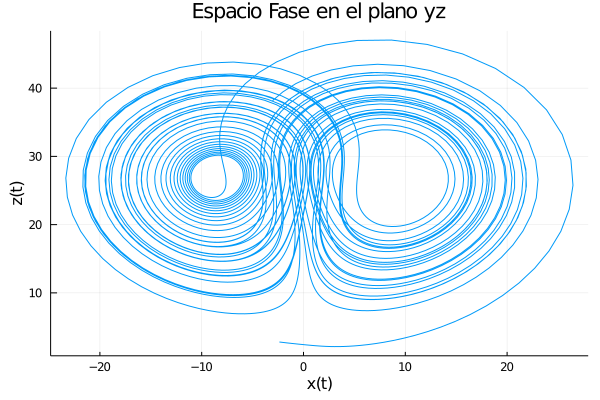

In [112]:
plot(title="Espacio Fase en el plano yz",xlabel="x(t)",ylabel="z(t)")
plot!(solucion4_1[:,2],solucion4_1[:,3])
plot!(legend=false)

Chequemos la precisión de nuestros calculos obteniendo la diferencia entre la solución dada por el código Rugen-Kutta de orden 2 con el de 4to orden.

In [55]:
presicion(0.1)

LoadError: BoundsError: attempt to access 32×2 Array{Float64,2} at index [33, 1]